# **DATA COLLECTION**

In [ ]:
# Import library
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('milknew.csv')

# Melihat lima baris pertama
print(data.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium


- import pandas as pd: Mengimpor pustaka pandas, yang digunakan untuk manipulasi dan analisis data.
- data = pd.read_csv('milknew.csv'): Membaca file CSV yang bernama 'milknew.csv' dan memuatnya ke dalam variabel data sebagai DataFrame.
- print(data.head()): Menampilkan lima baris pertama dari dataset untuk memberikan gambaran umum tentang data yang dimuat, seperti melihat kolom dan nilai pertama dalam dataset.

# **DATA UNDERSTANDING**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [ ]:
print(data.describe())

                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  


In [ ]:
print(data['Grade'].value_counts())

Grade
low       429
medium    374
high      256
Name: count, dtype: int64


- data.info(): Menampilkan informasi umum tentang dataset, seperti jumlah entri, nama kolom, jumlah nilai yang tidak kosong, tipe data kolom, dan penggunaan memori.
- data.describe(): Memberikan statistik deskriptif dari dataset, seperti rata-rata, standar deviasi, nilai minimum, dan maksimum, serta kuartil untuk setiap kolom numerik.
- data['Grade'].value_counts(): Menampilkan distribusi nilai dari kolom 'Grade', yang memberikan informasi tentang berapa banyak data yang ada di setiap kelas (misalnya, low, medium, high).

# **DATA PREPROSESSING**

In [ ]:
print(data.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [ ]:
# MELAKUKAN ENCODING PADA KOLOM KATEGORI MENJADI NUMERIK
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Taste'] = encoder.fit_transform(data['Taste'])
data['Odor'] = encoder.fit_transform(data['Odor'])

In [ ]:
data['Grade'] = data['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

In [ ]:
# MELAKUKAN STANDARISASI PADA FITUR NUMERIK TERTENTU DALAM DATASET
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['pH', 'Temprature', 'Colour']] = scaler.fit_transform(data[['pH', 'Temprature', 'Colour']])

- data.isnull().sum(): Memeriksa jumlah nilai kosong (null) dalam setiap kolom dataset. Ini membantu untuk mengetahui apakah ada data yang hilang dan memutuskan apakah perlu untuk menangani data yang hilang.
- Label Encoding:
LabelEncoder(): Mengimpor LabelEncoder dari sklearn.preprocessing untuk mengubah data kategori menjadi nilai numerik.
encoder.fit_transform(data['Taste']): Mengubah kolom 'Taste' yang berbentuk kategori menjadi numerik (misalnya, "Good" menjadi 1, "Bad" menjadi 0).
data['Grade'] = data['Grade'].map({'low': 0, 'medium': 1, 'high': 2}): Mengonversi nilai kategori di kolom 'Grade' menjadi angka dengan pemetaan langsung (misalnya, 'low' menjadi 0, 'medium' menjadi 1, dan 'high' menjadi 2).
- Feature Scaling:
StandardScaler(): Mengimpor StandardScaler untuk menstandarkan fitur numerik sehingga memiliki distribusi dengan mean = 0 dan standar deviasi = 1.
scaler.fit_transform(data[['pH', 'Temprature', 'Colour']]): Menerapkan scaling pada kolom 'pH', 'Temperature', dan 'Colour' agar fitur tersebut berada dalam skala yang sama dan tidak mendominasi satu sama lain.

In [ ]:
# import pandas as pd

# # Membaca dataset
# data = pd.read_csv("milknew.csv")

# # Menghitung distribusi kelas pada kolom target
# class_distribution = data['Grade'].value_counts()

# print(class_distribution)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Visualisasi distribusi kelas
# sns.countplot(x='Grade', data=data)
# plt.title('Distribusi Kelas Target')
# plt.show()

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Misalnya, 'df' adalah DataFrame Anda
# # Memisahkan fitur dan target
# X = data.drop('Grade', axis=1)  # Ganti 'target_column' dengan nama kolom target Anda
# y = data['Grade']

# # Split data menjadi training dan testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Oversampling dengan SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# print(f"Jumlah data setelah oversampling: {len(X_resampled)}")

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Undersampling dengan RandomUnderSampler
# undersample = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# print(f"Jumlah data setelah undersampling: {len(X_resampled)}")

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# # Menentukan class_prior jika Anda ingin mengatur distribusi kelas manual
# # Misalnya, kita memiliki 3 kelas dengan distribusi tertentu: 0.3, 0.4, 0.3
# class_prior = [0.3, 0.4, 0.3]  # Ganti dengan prior yang sesuai

# # Inisialisasi model dengan var_smoothing dan class_prior
# model = GaussianNB(var_smoothing=1e-9, priors=class_prior)

# # Latih model menggunakan data yang telah di-resample
# model.fit(X_resampled, y_resampled)

# # Prediksi pada data uji
# y_pred = model.predict(X_test)

# # Evaluasi model
# print("Akurasi:", accuracy_score(y_test, y_pred))

# **FEATURE SELECTION**

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix['Grade'].sort_values(ascending=False))

Grade         1.000000
Fat           0.151002
Odor          0.149626
pH            0.028980
Taste         0.025500
Colour       -0.056986
Turbidity    -0.153634
Temprature   -0.417789
Name: Grade, dtype: float64


- data.corr(): Menghitung matriks korelasi antara semua kolom dalam dataset. Matriks korelasi ini memberikan informasi tentang hubungan linier antara fitur-fitur numerik.
- correlation_matrix['Grade'].sort_values(ascending=False): Mengambil korelasi antara fitur lainnya dan kolom 'Grade' dan mengurutkannya dalam urutan menurun. Ini membantu untuk mengidentifikasi fitur mana yang paling berkorelasi dengan target (Grade) dan dapat digunakan untuk memilih fitur yang relevan.

# **DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- X = data.drop('Grade', axis=1): Membuat variabel X yang berisi semua fitur kecuali kolom 'Grade' (target). Ini berarti X adalah data input untuk model.
- y = data['Grade']: Menetapkan kolom 'Grade' sebagai target yang akan diprediksi oleh model.
- train_test_split(X, y, test_size=0.2, random_state=42): Membagi data menjadi training set dan test set. Data 80% digunakan untuk pelatihan dan 20% untuk pengujian. random_state=42 digunakan untuk memastikan pembagian yang konsisten setiap kali kode dijalankan.

# **MODEL TRAINING**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

- DecisionTreeClassifier: Menggunakan algoritma Decision Tree untuk pelatihan model klasifikasi. Model ini akan mempelajari pola dalam data pelatihan untuk memprediksi kelas target berdasarkan fitur input.
- dt_model.fit(X_train, y_train): Melatih model Decision Tree dengan data pelatihan (X_train) dan label target (y_train).
- GaussianNB: Menggunakan algoritma Naive Bayes dengan distribusi Gaussian. Model ini juga dilatih untuk memprediksi target.
- nb_model.fit(X_train, y_train): Melatih model Naive Bayes dengan data pelatihan (X_train) dan label target (y_train).

# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_model.predict(X_test)
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 0.9905660377358491
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.99      1.00      0.99        86
           2       0.98      0.98      0.98        48

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [ ]:
y_pred_nb = nb_model.predict(X_test)
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Akurasi Naive Bayes: 0.9433962264150944
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        78
           1       1.00      0.91      0.95        86
           2       0.80      1.00      0.89        48

    accuracy                           0.94       212
   macro avg       0.93      0.95      0.94       212
weighted avg       0.95      0.94      0.95       212



- accuracy_score(y_test, y_pred_dt): Menghitung akurasi model Decision Tree dengan membandingkan prediksi (y_pred_dt) dengan nilai asli (y_test) pada data uji.
- classification_report(y_test, y_pred_dt): Menyediakan laporan metrik evaluasi seperti precision, recall, f1-score, dan support untuk model Decision Tree.
- y_pred_nb = nb_model.predict(X_test): Membuat prediksi dengan model Naive Bayes menggunakan data uji (X_test).
- accuracy_score(y_test, y_pred_nb): Menghitung akurasi model Naive Bayes.
- classification_report(y_test, y_pred_nb): Menyediakan laporan metrik evaluasi untuk model Naive Bayes.

# **PERBANDINGAN HASIL**

Decision Tree - Akurasi: 0.9905660377358491
Decision Tree - Precision: 0.9906202559097809
Decision Tree - Recall: 0.9905660377358491
Decision Tree - F1 Score: 0.9905644545611264

Naive Bayes - Akurasi: 0.9433962264150944
Naive Bayes - Precision: 0.9547169811320755
Naive Bayes - Recall: 0.9433962264150944
Naive Bayes - F1 Score: 0.9453722317759422


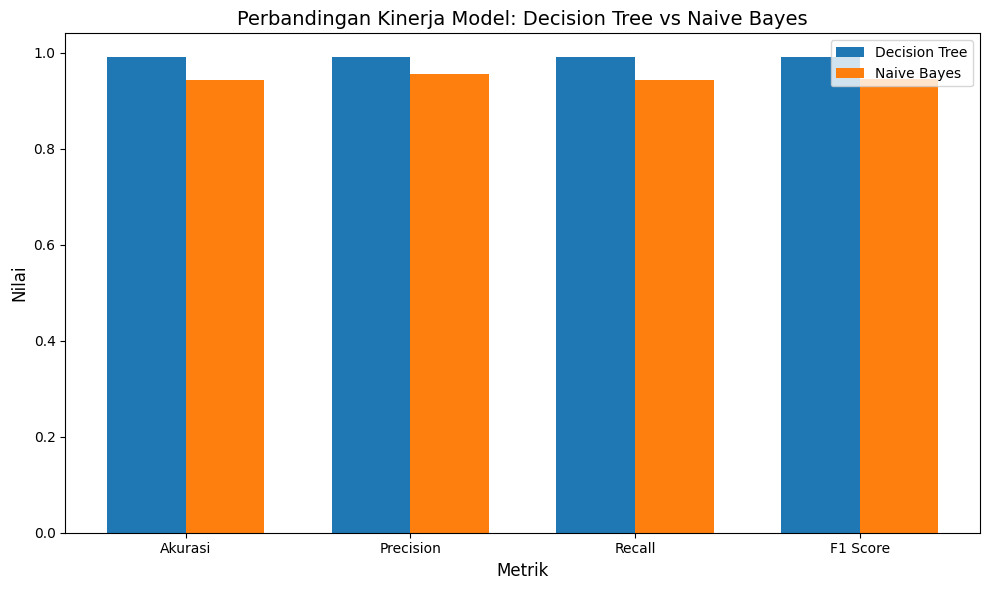

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi untuk Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Prediksi untuk Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Menghitung metrik untuk Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Menghitung metrik untuk Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Menampilkan hasil metrik
print("Decision Tree - Akurasi:", accuracy_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1 Score:", f1_dt)

print("\nNaive Bayes - Akurasi:", accuracy_nb)
print("Naive Bayes - Precision:", precision_nb)
print("Naive Bayes - Recall:", recall_nb)
print("Naive Bayes - F1 Score:", f1_nb)



import matplotlib.pyplot as plt
import numpy as np

# Nama metrik
metrics = ['Akurasi', 'Precision', 'Recall', 'F1 Score']

# Nilai metrik untuk Decision Tree dan Naive Bayes
values_dt = [accuracy_dt, precision_dt, recall_dt, f1_dt]
values_nb = [accuracy_nb, precision_nb, recall_nb, f1_nb]

# Lebar bar
bar_width = 0.35

# Posisi x untuk masing-masing model
index = np.arange(len(metrics))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, values_dt, bar_width, label='Decision Tree')
bar2 = ax.bar(index + bar_width, values_nb, bar_width, label='Naive Bayes')

# Menambahkan label dan title
ax.set_xlabel('Metrik', fontsize=12)
ax.set_ylabel('Nilai', fontsize=12)
ax.set_title('Perbandingan Kinerja Model: Decision Tree vs Naive Bayes', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

# **KESIMPULAN**

Kesimpulan
Decision Tree lebih baik dalam hal akurasi dan metrik evaluasi lainnya dibandingkan Naive Bayes pada dataset ini.
Dengan akurasi hampir 100% dan metrik yang sangat baik di semua kelas, Decision Tree mungkin merupakan pilihan yang lebih baik untuk aplikasi praktis dalam klasifikasi produk susu berdasarkan fitur yang ada.